<a href="https://colab.research.google.com/github/chrryyy/cs_4774_team_snorlax/blob/main/Analysis_of_Improving_Pedestrian_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4VA - Analysis of Improving Pedestrian Safety
Cheryl Bai, Eric Xie, Elaine Zhang

## Getting the Data

In [14]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(42)

crash_data = pd.DataFrame()
# read the dataset
for i in range(6):
  df = pd.read_csv("Crash_2020_2023_" + str(i) + ".csv")
  df_ped = df.loc[df["PED_NONPED"] == "Yes"]
  crash_data = pd.concat([crash_data, df_ped], ignore_index=True)

crash_data = crash_data.reset_index(drop=True)
crash_data

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-76.589129,37.213034,641773,203305319,2020,2020/10/22 03:59:59+00,1135,A,0,1,...,Urban,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA SR00143NB,27.07,646123.0,190.0
1,-76.709165,37.333128,641816,202645276,2020,2020/09/19 03:59:59+00,1330,A,0,1,...,Rural,VDOT Interstate,5,1. State Hwy Agency,Hampton Roads,HAMP,R-VA IS00064WB,236.33,NaN,NaN
2,-77.379622,37.214527,641989,203605036,2020,2020/12/22 05:00:00+00,1837,B,0,0,...,Urban,VDOT Interstate,1,1. State Hwy Agency,Crater,TCAT,R-VA IS00095NB DCR050.00X,0.31,709761.0,623.0
3,-77.221516,37.643252,641994,202605140,2020,2020/09/15 03:59:59+00,640,B,0,0,...,Rural,VDOT Secondary,1,1. State Hwy Agency,Richmond Regional,RICH,R-VA042SC00628NB,7.54,374391.0,554.0
4,-76.350701,36.822881,642032,202745098,2020,2020/09/29 03:59:59+00,1053,A,0,1,...,Urban,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA US00058EB,485.78,483072.0,1146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,-78.489160,38.056671,1048299,232425285,2023,2023/08/22 03:59:59+00,1913,B,0,0,...,Urban,NonVDOT primary,3,3. City or Town Hwy Agency,Thomas Jefferson,CVIL,R-VA US00250EB,95.64,111429.0,375.0
4898,-77.444396,37.551889,1048339,230765253,2023,2023/03/17 03:59:59+00,1727,A,0,1,...,Urban,NonVDOT primary,1,3. City or Town Hwy Agency,Richmond Regional,RICH,R-VA US00001NB,93.84,209567.0,48.0
4899,-77.404846,38.899678,1048473,232245088,2023,2023/07/09 03:59:59+00,2240,A,0,1,...,Urban,VDOT Primary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA SR00286SB,23.21,NaN,NaN
4900,-76.963614,38.254560,1048521,231675202,2023,2023/06/16 03:59:59+00,1200,C,0,0,...,Rural,NonVDOT secondary,1,3. City or Town Hwy Agency,Northern Neck,NaN,S-VA199NP WASHINGTON AVE,0.30,NaN,NaN


In [15]:
# select relevant columns for analysis
cols = ["X", "Y", "CRASH_YEAR", "CRASH_DT", "CRASH_MILITARY_TM", "CRASH_SEVERITY", "PEDESTRIANS_KILLED", "PEDESTRIANS_INJURED", "WEATHER_CONDITION", "LIGHT_CONDITION",
        "ROADWAY_SURFACE_COND", "RELATION_TO_ROADWAY", "ROADWAY_ALIGNMENT", "ROADWAY_SURFACE_TYPE", "ROADWAY_DEFECT", "ROADWAY_DESCRIPTION", "INTERSECTION_TYPE",
        "TRAFFIC_CONTROL_TYPE", "TRFC_CTRL_STATUS_TYPE", "SCHOOL_ZONE", "FIRST_HARMFUL_EVENT", "FIRST_HARMFUL_EVENT_LOC", "ALCOHOL_NOTALCOHOL", "DISTRACTED_NOTDISTRACTED",
        "DROWSY_NOTDROWSY", "DRUG_NODRUG", "SPEED_NOTSPEED", "INTERSECTION_ANALYSIS", "SENIOR_NOTSENIOR", "YOUNG_NOTYOUNG", "MAINLINE_YN", "NIGHT", "AREA_TYPE"]

crash_data = crash_data[cols]

In [16]:
# quick summary of the dataset
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X                         4902 non-null   float64
 1   Y                         4902 non-null   float64
 2   CRASH_YEAR                4902 non-null   int64  
 3   CRASH_DT                  4902 non-null   object 
 4   CRASH_MILITARY_TM         4902 non-null   int64  
 5   CRASH_SEVERITY            4902 non-null   object 
 6   PEDESTRIANS_KILLED        4902 non-null   int64  
 7   PEDESTRIANS_INJURED       4902 non-null   int64  
 8   WEATHER_CONDITION         4902 non-null   object 
 9   LIGHT_CONDITION           4902 non-null   object 
 10  ROADWAY_SURFACE_COND      4902 non-null   object 
 11  RELATION_TO_ROADWAY       4902 non-null   object 
 12  ROADWAY_ALIGNMENT         4902 non-null   object 
 13  ROADWAY_SURFACE_TYPE      4902 non-null   object 
 14  ROADWAY_

In [5]:
# information about number of entires and features
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[0]) + " entries.")
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[1]) + " features.")

The selected pedestrian related crash dataset has 4902 entries.
The selected pedestrian related crash dataset has 33 features.


In [17]:
# check for missing values
if crash_data.isnull().sum().sum() > 0 :
  print("The dataset contains missing values.")
else:
  print("The dataset doesn't contain missing values.")

The dataset doesn't contain missing values.


In [18]:
# basic statistics about the dataset
crash_data.describe()

,X,Y,CRASH_YEAR,CRASH_MILITARY_TM,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED
count,4902.000000,4902.000000,4902.000000,4902.00000,4902.000000,4902.000000
mean,-77.535697,37.824514,2021.368013,1480.27703,0.098735,0.949000
std,1.202992,0.820512,1.029468,594.11329,0.301060,0.393077
min,-83.548218,36.555105,2020.000000,0.00000,0.000000,0.000000
25%,-77.540627,37.078773,2020.000000,1100.00000,0.000000,1.000000
50%,-77.373746,37.552246,2021.000000,1630.00000,0.000000,1.000000
75%,-77.049164,38.789131,2022.000000,1934.00000,0.000000,1.000000
max,-75.361560,39.319785,2023.000000,2359.00000,2.000000,7.000000


In [19]:
# rename variables
crash_data = crash_data.rename(columns={'X': 'longitude', 'Y': 'latitude'})

## Data Discovery

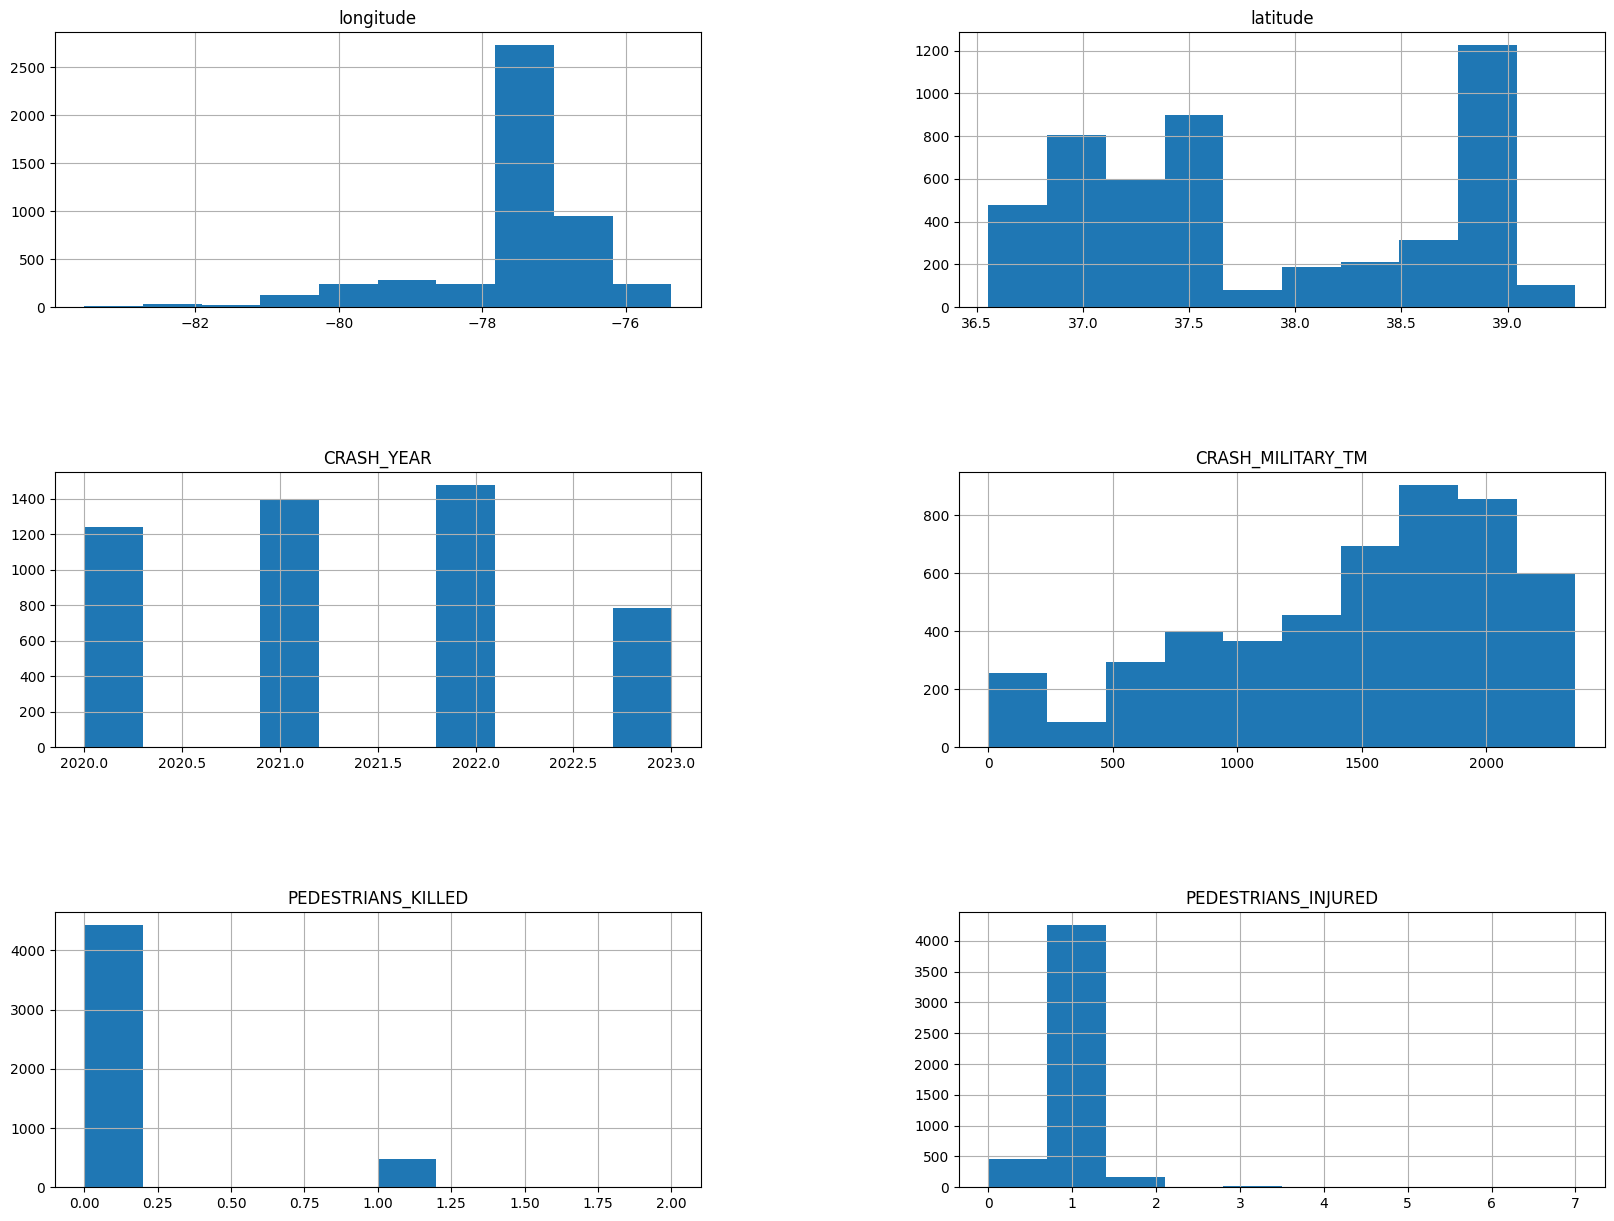

In [20]:
# plotting the features
crash_data.hist(bins = 10, figsize = (20, 15))
plt.subplots_adjust(wspace = 0.4,hspace = 0.6)
plt.show()

## Data Preparation and Cleaning

In [21]:
# split the data into train set, validation set and test set
from sklearn.model_selection import train_test_split

X = crash_data.drop("CRASH_SEVERITY", axis = 1)
y = crash_data["CRASH_SEVERITY"].copy()

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [ ]:
# separate into numerical and categorical
crash_num = X.select_dtypes(include=[np.number])
crash_cat = X.select_dtypes(exclude=[np.number])

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# transformation pipeline for numerical data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

# combine with categorical to create full pipeline
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
